# Exploratory data analysis - Workshop 02

### Kevin Artunduaga / 2216155

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df = pd.read_excel("C:/Users/kevin/ETL/workshop_02/workshop_02/the_grammy_awards.xlsx")

Importo las librerias pandas y matplotlib para las visualizaciones, arranco primero con el excel de los premios Grammy.

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
# Simplemente imprime el DataFrame
print(df)

      year                              title               published_at  \
0     2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
1     2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
2     2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
3     2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
4     2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
5     2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
6     2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
7     2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
8     2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
9     2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
10    2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
11    2019  62nd Annual GRAMMY Awards  (2019)  2020-05-19T05:10:28-07:00   
12    2019  

Con estos comandos logro poder ver completamente todas las filas y columnas de los datos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


Podemos ver que el excel dispone de 10 columnas y un total de filas de 4810, el cual casi todos los datos son tipo Varchar pero la de year(año) es la unica que es un entero claramente.

In [3]:
df.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


Aqui quise poder ver las primeras filas y analizar el excel, que de primeras se puede ver que la columna de img esta la posibilidad de eliminarse, debido a que es un link y no creo que se le pueda dar un buen uso a esa imagen.

In [4]:
df.isnull().sum()

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64

Para los valores nulos las columnas que disponen de valores faltantes son los artistas, trabajadores y imagen.

In [5]:
df.describe()

,year
count,4810.000000
mean,1995.566944
std,17.149720
min,1958.000000
25%,1983.000000
50%,1998.000000
75%,2010.000000
max,2019.000000


Hice un describe para analizar de manera rapida la columna de año, en donde se puede apreciar que el año mas antiguo es el 1958 y el mas reciente es el 2019, tambien podemos sacar el año promedio que es aproximadamente 1996.

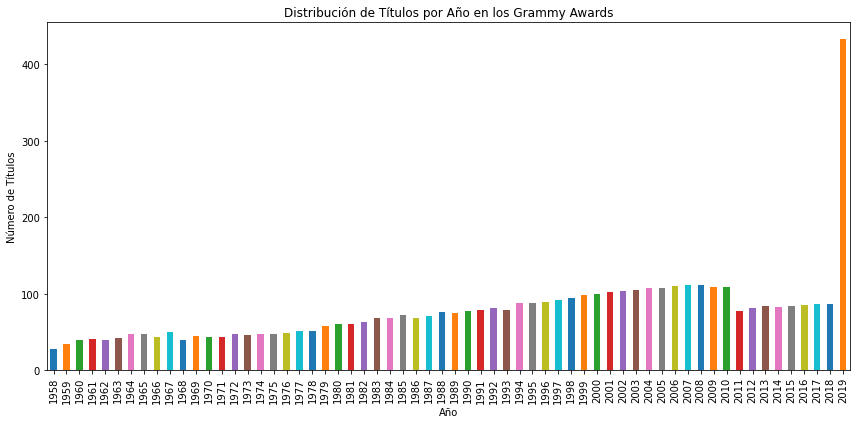

In [32]:
titleYear_counts = df['year'].value_counts().sort_index()

paleta_colores = list(mcolors.TABLEAU_COLORS.values())

plt.figure(figsize=(12, 6))
titleYear_counts.plot(kind='bar', color=paleta_colores)
plt.title('Distribución de Títulos por Año en los Grammy Awards')
plt.xlabel('Año')
plt.ylabel('Número de Títulos')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [13]:
unique_artists = df['artist'].unique()
unique_artists_sorted = sorted(str(artist) for artist in unique_artists)

for artist in unique_artists_sorted:
    print(artist)

(Bulgarian State Female Vocal Choir)
(David Seville And The Chipmunks) Ross Bagdasarian, Sr.
(Depeche Mode)
(Franklin Delano Roosevelt)
(Jane Ira Bloom)
(Jim Henson's Muppets & The Sesame Street Cast)
(Jimi Hendrix)
(Joe South)
(John F. Kennedy)
(John Lennon)
(Miles Davis)
(Miles Davis) & Various Artists
(Mormon Tabernacle Choir)
(Original Broadway Cast)
(Original Cast)
(Sam Cooke)
(Sesame Street Cast)
(Sesame Street Characters)
(Simon And Garfunkel)
(Sly & The Family Stone), John Legend, Joss Stone With Van Hunt
(The Beatles)
(The Doors)
(The Maranatha! Kids)
(The Muppets)
(The Muppets, Glen Campbell, Crystal Gayle, Loretta Lynn, Tanya Tucker)
(The Sesame Street Muppets & Various Artists)
(The Sesame Street Muppets)
(Uta Hagen, Arthur Hill, George Grizzard & Melinda Dillon)
(Various Artists)
2+2 Plus
21 Savage
5th Dimension
A Flock Of Seagulls
A Great Big World With Christina Aguilera
AC/DC
Aaron Neville & Trisha Yearwood
Adele
Adele Adkins & Paul Epworth, songwriters (Adele)
Aerosmit

Peter Gabriel
Peter Gabriel & Thomas Newman, songwriters (Peter Gabriel)
Peter Kater
Peter Nero
Peter Schickele
Peter Schickele, narrator; The Chestnut Brass Company
Peter Tosh
Peter Ustinov (Herbert von Karajan, cond.)
Peter, Paul And Mary
Petra
Petula Clark
Pharrell Williams
Phil Collins
Phil Collins & Lamont Dozier, songwriters (Phil Collins)
Phil Woods
Phil Woods Quartet
Philip Bailey
Phoenix
Pinetop Perkins & Willie 'Big Eyes' Smith
Pink
Pink Floyd
Pistol Annies
Pitbull
Placido Domingo
Poncho Sanchez
Pops Staples
Porter Wagoner & The Blackwood Brothers
Porter Wagoner And The Blackwood Brothers
Porter Wagoner And The Blackwood Brothers Quartet
Portugal. The Man
Post Malone & Swae Lee
Prince
Prince & The Revolution
Professor Longhair
Puff Daddy & Faith Evans Featuring 112
Puff Daddy & The Family
Punch Brothers
Queen Ida
Queen Latifah
Quetzal
Quincy Jones
Quincy Jones (And Various Artists)
R. Kelly
R. Kelly, songwriter (R. Kelly)
R.E.M.
ROSALÍA
Radiohead
Rage Against The Machine
Ralp

Aqui hice un codigo para mirar si los artistas si estaban normalizados es decir que los nombres no disponian de diferencias por mayusculas o algun otro factor, pero al hacer un analisis por encima de cada uno hay varios artistas con algunas diferencias aunque sean el mismo, asi que los que pude ver que eran parecidos y se podian ormalizar son los siguientes.

Valores a normalizar:

(Sesame Street Cast)
(Sesame Street Characters)

David Seville & The Chipmunks (Ross Bagdasarian, Sr.)
David Seville And The Chipmunks (Ross Bagdasarian, Sr.)

Bill & Gloria Gaither & The Homecoming Friends
Bill & Gloria Gaither & Their Homecoming Friends

Johnny Cash & June Carter
Johnny Cash And June Carter

Jon Stewart (With  Samantha Bee, Wyatt Cenac, Jason Jones, John Oliver & Sigourney Weaver)
Jon Stewart And The Cast Of The Daily Show

Mariachi Divas
Mariachi Divas De Cindy Shea

Mariachi Los Camperos
Mariachi Los Camperos de Nati Cano

Max Martin, Shellback & Justin Timberlake, songwriters (Justin Timberlake, Anna Kendrick, Gwen Stefani, James Corden, Zooey Deschanel, Walt Dohrn, Ron Funches, Caroline Hjelt, Aino Jawo, Christopher Mintz-Plasse & Kunal Nayyar)

Natalie Cole (& Nat "King" Cole)
Natalie Cole (With Nat "King" Cole)

Pat Metheny
Pat Metheny Group
Pat Metheny Unity Band

Porter Wagoner & The Blackwood Brothers
Porter Wagoner And The Blackwood Brothers
Porter Wagoner And The Blackwood Brothers Quartet

R. Kelly
R. Kelly, songwriter (R. Kelly)

Ramsey Lewis
Ramsey Lewis Trio

Ricky Skaggs & Kentucky Thunder
Ricky Skaggs And Kentucky Thunder

T Bone Burnett, Taylor Swift, John Paul White & Joy Williams, songwriters (Taylor Swift Featuring The Civil Wars)

The Muppets
(The Muppets)

TobyMac
Tobymac

USA For Africa (Various Artists)
USA For Africa - Various Artists

Wynton Marsalis
Wynton Marsalis Group

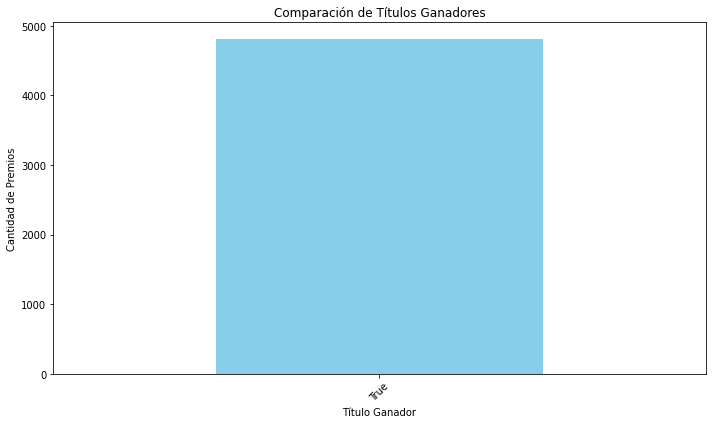

In [2]:
title_counts = df['winner'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6)) 
title_counts.plot(kind='bar', color='skyblue')
plt.title('Comparación de Títulos Ganadores')
plt.xlabel('Título Ganador')
plt.ylabel('Cantidad de Premios')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

Aqui quise ver si la columna winner tenian canciones que no habian ganado el Grammy, pero todos ganaron por lo tanto veo innecesario el uso de esta columna si todos ganaron.

In [4]:
df_spotify = pd.read_csv("C:/Users/kevin/ETL/workshop_02/workshop_02/spotify_dataset.csv", delimiter=',')

Aqui comence a hacer el EDA de el csv de spotify, este teia el delimitador con la ,

In [5]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Este dataset contiene 21 columnas y 114.000 filas, en donde 9 columnas son decimales, 6 de enteros y 5 tipo varchar, como este dataset es mas que todo sobre calificaciones on escalas de decimales esa es la razon.

In [9]:
df_spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Aqui quise hacer un analisis rapido de las filas, en donde pude ver que la primera columna Unnamed:0 es al parecer un id, el cual me parece mas funcional que el track_id que es un identificador para spotify, y al parecer las demas cosas si estaban de acuerdo a la descripcion de el dataset de Kaggle.

In [10]:
df_spotify.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [11]:
df_spotify.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Para la cuestion de los nulos no hay casi ninguno, solamente hay 1 valor nulo en artists, album_name y track_name que pensaria que es solo de una fila.

In [13]:
unique_artists_spotify = df_spotify['artists'].unique()
unique_artists_sorted_spotify = sorted(str(artists) for artists in unique_artists_spotify)

for artists in unique_artists_sorted_spotify:
    print(artists)

!nvite
"Puppy Dog Pals" Cast
"Weird Al" Yankovic
#Kids;Nursery Rhymes;Nursery Rhymes and Kids Songs
$affie
$affie;lofi stu
&ME;Rampa;Adam Port;Sofie Royer
'Falsettos' 2016 Broadway Company
'Til Tuesday
(DOLCH)
(G)I-DLE
(Hed) P.E.
(Hed) P.E.;Lajon Witherspoon;Sevendust
(Hed) P.E.;Serj Tankian;Morgan Lander
-M-
04 Limited Sazabys
1 Trait Danger
10 Years
10-FEET
10-FEET;Yabai T-Shirts Yasan
100 Blaze
100 Blaze;Lacrim
1019;Lucio101;Omar101;Nizi19;Karamel19
102 Boyz;Chapo102;Stacks102;Skoob102
102 Boyz;The Cratez;Chapo102;Skoob102;Stacks102
10cc
10cm
110
12 Stones
1200 Micrograms
1280 Almas
12AM
12th Planet
12th Planet;Bandlez;Barely Alive;Chibs;Dirtyphonics;Disciple;Dodge & Fuski;Eliminate;Fox Stevenson;Infekt;Modestep;MVRDA;Myro;Oliverse;PhaseOne;SampliFire;Terravita;Virus Syndicate;Virtual Riot
12th Planet;Katie Sky
13
13 Block
1349
13th Floor Elevators
163
16BL
175R
1782
1788-L;TYNAN
19
1986zig
1986zig;AYLIVA
1988;Kukon
1991
1995
1PLIKÉ140
2 Best Enemies
2 Blyga Läppar
2 Blyga Läppar;Dr

Andrew Lloyd Webber;Il Divo;Lea Salonga;Simon Chalk
Andrew Lloyd Webber;Ivano Turco;Carrie Hope Fletcher
Andrew Lloyd Webber;Jane Gilchrist;Fergus Thirwell;Simon Gibson;Kirk Trevor;Slovak Radio Symphony Orchestra
Andrew Lloyd Webber;John Williams;Boston Pops Orchestra
Andrew Lloyd Webber;Kevin McNally;Jennifer Ellison;Miranda Richardson
Andrew Lloyd Webber;Laura Baldwin;Georgina Castle;Victoria Hamilton-Barritt
Andrew Lloyd Webber;Michael Crawford;Sarah Brightman;Steve Barton
Andrew Lloyd Webber;Original Evita Cast
Andrew Lloyd Webber;Patrick Wilson;Emmy Rossum
Andrew Lloyd Webber;Patrick Wilson;Miranda Richardson
Andrew Lloyd Webber;Patrick Wilson;Simon Callow;Ciaran Hinds
Andrew Lloyd Webber;Patti LuPone
Andrew Lloyd Webber;Phantom Of The Opera Original London Cast
Andrew Lloyd Webber;The Andrew Lloyd Webber Orchestra;Simon Lee
Andrew Lloyd Webber;The Phantom Of The Opera 1986 Studio Orchestra
Andrew Lloyd Webber;Todrick Hall
Andrew Lloyd Webber;Victor Mcguire
Andrew Lloyd Webber;Vic

Becky G
Becky G;Bad Bunny
Becky G;Burna Boy
Becky G;Daviles de Novelda
Becky G;Digital Farm Animals;Rvssian
Becky G;KAROL G
Becky G;Natti Natasha
Becky Hill
Becky Hill;David Guetta
Becky Hill;Joel Corry
Becky Hill;Just Kiddin
Becky Hill;Shift K3Y
Becky Hill;Topic
Beddy Rays
Bedo
Bedtijd
Bedtime Baby
Bee Gees
Bee Gees;SG Lewis
Beendo Z
Beenie Man
Beenie Man;Akon
Beenie Man;Assia
Beenie Man;Blakk Man
Beenie Man;Janet Jackson
Beenie Man;La J
Beenie Man;Mr. Vegas;T.O.K
Beenie Man;Ms. Thing
Beenie Man;Mýa
Beenie Man;Redman;Wyclef Jean;RockWilder
Beenie Man;Top Secret Music;Mark Topsecret;Ansel Collins
Beenie Man;Wyclef Jean
Beenie Man;Yo West
Before I Turn
Begum Akhtar
Behemoth
Being As An Ocean
Bekar
Belanova
Belchior
Belchior;Gilvan de Oliveira
Beleza e Maravilha
Belfa;Kayli Marie
Belinda Carlisle
Belinda;Pitbull
Bell Marques
Bella Poarch
Bella Poarch;Grimes
Belle
Belle and the Nursery Rhymes Band
Belleruche
Bellorum
Belmonte & Amaraí
Belo
Belo;Mousik
Belo;Padre Marcelo Rossi
Belo;Perlla


Carlos Gardel;Francisco Canaro Y Su Orquesta Tipica
Carlos Gardel;Itzhak Perlman;John Williams;Pittsburgh Symphony Orchestra
Carlos Lico
Carlos Lombardi;Los Românticos De La Noche
Carlos Lyra
Carlos Marin
Carlos Moscardini
Carlos Paredes
Carlos Roldán
Carlos Sadness
Carlos Sadness;Bomba Estéreo
Carlos Sadness;Manuel Medrano
Carluccio
Carly Lyman;Jason Lux
Carly Pearce
Carly Rae Jepsen
Carmela Y Rafael
Carmen Campagne
Carmen Cusack;Bright Star Original Broadway Ensemble
Carmen Twillie;Lebo M.
Carnage;Lil Yachty
Carnage;THIRTY RACK
Carnage;Timmy Trumpet
Carnifex
Carnivore
Carola
Carolee Carmello
Carolee Carmello;Andrew Keenan-Bolger;Robert Lenzi
Carolee Carmello;Brent Carver
Carolee Carmello;Matthew Morrison;Aidan Gemme;Christopher Paul Richards;Sawyer Nunes;Alex Dreier
Carolee Carmello;Robert Lenzi;Andrew Keenan-Bolger;Sarah Charles Lewis
Carolee Carmello;Robert Lenzi;Andrew Keenan-Bolger;Tuck Everlasting Original Broadway Company
Carolina & Her Rhythm Rockets
Carolina Chocolate Drops
C

DJ Icey;Rae Ann
DJ Isaac
DJ Isaac;D-Block & S-te-Fan
DJ Jamaika
DJ Jantje;Arjon Oostrom
DJ Jayhood
DJ Jeeh FDC;MC Meno Dani;MC Ryan GF;Yuri Redicopa
DJ KS SHEIK
DJ Kantik
DJ Kayz;Mister You;Dr Zeus;Sophia Akkara
DJ Koze
DJ Koze;&ME;Sophia Kennedy
DJ Krazy
DJ Krush
DJ Krush;JUMADIBA
DJ LILMAN
DJ LILMAN;DJ Taj
DJ LILMAN;DJ Wallah
DJ LILMAN;Dj Flawless
DJ LILMAN;Jiddy
DJ LILMAN;West End Tricks
DJ Lg do Sf;GORDÃO DO PC;DJ 2K DO TAQUARIL;MC Garoto;Mc Leozin
DJ Luck & MC Neat
DJ Luck & MC Neat;Simon Dunne;Chili;Anonymous Dubs
DJ MAVICC;DJ KS;DJ RD DA DZ7
DJ Marky;Javeon
DJ Marky;XRS
DJ Martiens;De'nie wel Rave
DJ Mass;Romaine Willis;Apzi
DJ Matheus Lazaretti
DJ Matt D;Menor MC;MC Kevin o Chris;Mc Marcela GC;Helamã MC;Mc negrone;MC Julio D.E.R.;Mc Lele JP;MC Leozinho ZS
DJ Maurice
DJ Maurice;De Alpenzusjes
DJ Maurice;Jelle B.
DJ Maurice;Snollebollekes
DJ Mongoose
DJ Mox
DJ Mutiny;Shopliftas
DJ Nelson;Jose De Las Heras;Alejandro Armes;Babywine;Alberto Stylee
DJ Neptune;Joeboy;Mr Eazi
DJ Neptun

Divya Kumar;Sravana Bhargavi
Dizaro;Binkie
Dizaro;WLZN
Dizharmonia;Sazin
DizzyEight;Khantrast
Dj Arthur Almeida
Dj Batata;Mc Nego Blue
Dj Chris No Beat;Hugo e Heitor
Dj Chris No Beat;Rafael Frare
Dj Chris No Beat;Théo e Thiago
Dj GM;MC GP;Mc Kako;MC Tuto;Love Funk
Dj GM;MC Liro;MC Leozinho ZS;Love Funk;Mc Piedro;MC Lemos
Dj GM;MC Vinny;Mc Kanhoto;Love Funk;MC Lemos;Gabb MC
Dj GM;Mc Lele JP;Love Funk
Dj Gizmo
Dj Gizmo;The Darkraver
Dj Guuga;Biu do Piseiro;MC Myres
Dj Joe
Dj Kape;Vivi
Dj Kass;Pitbull
Dj Kevin;Antony & Gabriel
Dj Kevin;Brenno & Matheus
Dj Mad Dog
Dj Mad Dog;Anime
Dj Mad Dog;MC Jeff
Dj Mad Dog;MC Syco
Dj Mehmet Tekin
Dj Promo
Dj Ray Lais;Mc Dricka
Dj Rob & MC Joe
Dj Skinhead;Chaotic Hostility
Dj T.H.;EKE (NL)
Dj T.H.;Gid Sedgwick
Dj T.H.;Mitraz
Dj Tg Da Inestan;DJ PH DA SERRA;Dj Wesley Gonzaga;Dj Nattan;Dj Luizin;DJ João da Inestan
Dj Tg Da Inestan;Mc Gw;DJ Ws da Igrejinha;Mc Morena;MC Fahah;MC Rkosta
Dj Thera
Dj Thera;Mizz Behave
Dj Thera;Nova Jae
Dj Thera;Yuna-X
Dj Viana

Extreme Music
Extreme Noise Terror
Eyci and Cody
Eydís Evensen
Eyes Wide Open
Eyla Calmes
Eyshila
Eyshila;Fernandinho
Eyshila;Weslei Santos
Eza
Ezequiel Colón
Ezginin Günlügü
Ezhel
Ezio Oliva;ADSO
Ezitsuj
F.B. Piano Anime
F.G. Noise;Costa Pantazis
F.I.R.
F.O.O.L
F.O.O.L;Caster
F.O.O.L;Extra Terra
F.O.O.L;Holly Drummond
F.O.O.L;Klasey Jones
F.O.O.L;Power Glove
F.R. David
F.Y.P
F4
FACE
FACE;Squirrel Flower
FAKY
FASCINATING AIDA
FBC;VHOOR;Mariana Cavanellas
FCL;Mousse T.
FDVM;Henri PFR
FDVM;TWOPILOTS
FEEST DJ MAARTEN
FEEST DJ MAARTEN;Benjamin;DJ Petit
FEEST DJ MAARTEN;Nederlandse Hardstyle
FERNANDOCOSTA
FERNANDOCOSTA;Dollar Selmouni
FES☆TIVE
FEVER 333
FFRAGEZEICHEN
FGFC820
FIL BO RIVA
FINNEAS
FISHER
FIT Siegel
FIT Siegel;Kassem Mosse
FIT Siegel;Tim Love Lee;Carl Craig
FKA twigs
FKA twigs;Central Cee
FKA twigs;Daniel Caesar
FKA twigs;Dystopia
FKA twigs;Future
FKA twigs;Headie One;Fred again..
FKA twigs;Jorja Smith;unkown t
FKA twigs;Pa Salieu
FKA twigs;Rema
FKA twigs;Shygirl
FKA twigs;The 

Gershon Jackson;Reset Preset;Ella
Gerson Rufino
Gersson Edinbaro
Gerusa Barros
Gesaffelstein
Gesaffelstein;Pharrell Williams
Gesaffelstein;The Hacker;Electric Youth
Gesaffelstein;The Weeknd
Gescom
Geskia!;Hakobune
Gestört aber GeiL;Anna Grey
Gestört aber GeiL;SkinnyJewlz
Get Dead
Get Scared
Geto Boys
Ghauri;Lal Chand Yamla Jatt
Ghauri;Noor Chahal
Ghetto Boy
Ghibran;Sathyaprakash
Ghibran;Sid Sriram
Ghibran;Sundar Narayana Rao;Malavika Anilkumar
Ghost
Ghost Rider
Ghost Rider;Ranji;Major7
Ghost Rider;Ranji;Stonefox
Ghost Stories;D-Block & S-te-Fan
Ghost Town
GhostDragon;Caslow;Red Comet;Alina Renae
GhostDragon;Daye
GhostDragon;Exede
GhostDragon;Kwesi
GhostDragon;YERINMYWAY;Nate Mitchell
GhostDragon;lullaboy
Ghostemane
Ghoultown
Giacomo Meyerbeer;Luciano Pavarotti;National Philharmonic Orchestra;Oliviero de Fabritiis
Giacomo Puccini;Anna Netrebko;Rolando Villazón;Boaz Daniel;Bavarian Radio Symphony Orchestra;Bertrand de Billy
Giacomo Puccini;Arioso Quartett Wien
Giacomo Puccini;Arranged By

Hubert Wu
Hucci
Huda Hudia;DJ Fixx
Huda Hudia;DJ30A
Hudson Mohawke
Huerco S.
Hues Corporation
Huey Dunbar
Hugar
Hugh Hardie
Hugh Hardie;Cimone
Hugh Hardie;Kyan
Hugh Jackman;Keala Settle;Zac Efron;Zendaya;The Greatest Showman Ensemble
Hugh Jackman;The Greatest Showman Ensemble
Hugh Masekela
Hugh Masekela;Black Coffee
Hugh Masekela;Gugu Shezi
Hugo
Hugo & Vitor;Clayton & Romário
Hugo Del Carril
Hugo Del Vecchio;Marília Mendonça
Hugo Díaz
Hugo Henrique
Hugo TSR
Huichol Musical
Hujan
Hulder
Huma
Human Remains
Human Resource
Human Resource;Frank De Wulf
Humberto & Ronaldo
Humberto & Ronaldo;Gusttavo Lima;Jorge & Mateus
Humberto & Ronaldo;Humberto Júnior
Humberto & Ronaldo;Jorge & Mateus
Humberto & Ronaldo;Ícaro e Gilmar
Humberto Gessinger
Humbreaders
Hummingbird of Death
Hunter Foster
Hunter Foster;Derek Klena;Caitlin Kinnunen;Kelli O'Hara
Hunter Foster;Lisa Brescia
Hunter Foster;Lisa Brescia;Kate Wetherhead;Jared Gertner
Hunter Foster;Nancy Opel;Rachel Coloff;Rick Crom;Kay Walbye;Victor W. 

John Wayne;Yuri Lemes;Milton Aguiar
John Wildcat
John Wildcat;Dogge Doggelito
John Wildcat;Raggarbritta
John Williams;Byron Nelson High School Symphony Orchestra;Gary Keller
John Williamson
Johnnie Ray
Johnnie Taylor
Johnny & The Hurricanes
Johnny Burnette
Johnny Burnette & The Rock 'N' Roll Trio
Johnny Cash
Johnny Dinamo
Johnny Dynamo
Johnny Hates Jazz
Johnny Hooker
Johnny Hooker;Gaby Amarantos
Johnny Hooker;Jáder
Johnny Hunter
Johnny Ip
Johnny Kidd & The Pirates
Johnny Laboriel
Johnny Laboriel;Johnny Laboriel / Los Rebeldes Del Rock
Johnny Laboriel;Los Rebeldes Del Rock
Johnny Maddox
Johnny Maestro;The Crests
Johnny Osbourne
Johnny Pacheco;Celia Cruz
Johnny Pacheco;Pete "El Conde" Rodriguez
Johnny Preston
Johnny Ray Salsa Con Clase
Johnny Rivers
Johnny Stimson
Johnny Stimson;Jeff Bernat;Jesse Barrera
Johnny Tillotson
Johnny Yin
Johnnyswim
Joi Barua
Joi Barua;Neuman Pinto
Joi Barua;Suraj Jagan
Joi Casette
Joji
Jok'air
Jok'air;Le Juiice
Jok'air;Linema
Joker
Joker Xue
Joker;Allame
Joker

Kings Of Tomorrow;Julie Mc Knight
Kings of Günter
Kings of Günter;Der Lieblingsidiot
Kings of Günter;Effeltricher Fosanochtsverein
Kinky
Kinniku Shōjo Tai
Kino
Kinobe
Kinobe;Jason;Ben
Kinobe;Stephan Hague
Kinobe;Stephen Hague
Kinokoteikoku
Kip Moore
Kiprich
Kiri Te Kanawa;Luise Edeiken;Angelina Reaux;Stella Zambalis;Leonard Bernstein
Kiro Akiyama
Kisch
Kishore Kumar
Kishore Kumar;Anette
Kishore Kumar;R. D. Burman
Kishore Kumar;S. D. Burman
Kishori Amonkar
Kit Chan
Kitaro
Kitchen Dwellers
Kite
Kitri
Kittie
Kiwini Vaitai
Kjell Höglund
Klaangen
Klaas
Klaatu
Klamydia
Klangkuenstler;Alice Phoebe Lou
Klaus & Klaus
Klaus & Klaus;Jürgen Milski
Klaus & Klaus;Lorenz Büffel
Klaus Badelt
Klaus Badelt;Lisa Gerrard;Gavin Greenaway;The Lyndhurst Orchestra
Klavdiya Shulzhenko
Klavdiya Shulzhenko;Борис Мандрус;Евгений Выставкин;Геннадий Мельников;Юрий Мухин;Владимир Флоря;Владимир Свешников
Klavdiya Shulzhenko;Юрий Силантьев;Эстрадно-симфонический оркестр Всесоюзного радио и Центрального телевидения
Kl

Lost Frequencies;Janieck
Lost Kids
Lost Stories;Akanksha Bhandari;Zaeden
Lost Stories;Jonita Gandhi;Ashwin Adwani
Lost Stories;KASYAP;Yashraj
Lostboycrow
Lotta Engberg
Lou Bega
Lou Rawls
Lou Reed
Louane
Loubet
Loubet;Fernando & Sorocaba
Loubet;Israel & Rodolffo
Loud Luxury;Brando
Loud Luxury;KIDDO
Louie Anderson
Louie Cut
Louie Vega;Elements Of Life;Blaze
Louie Vega;Monique Bingham
Louis & Clark
Louis Armstrong
Louis Armstrong;Benny Carter
Louis Armstrong;Ella Fitzgerald
Louis Armstrong;The Commanders
Louis Capone
Louis Chedid;Yvan Cassar
Louis Katz
Louis Koo
Louis Pascal
Louis Prima;Keely Smith;Sam Butera & The Witnesses
Louis Prima;Sam Butera & The Witnesses
Louis Prima;Sam Butera & The Witnesses;Keely Smith
Louis The Child;Kasbo;EVAN GIIA
Louise Attaque
Louise Hoffsten;Albin Lee Meldau
Lourenco & Lourival
Louro Santos & Forró da Malagueta
Louyah
Lov1
Lovage;Nathaniel Merriweather
Love
Love Falk
Love Unlimited
Love and Rockets
Love of Lesbian
Love to Sing
LoveJSan
Loveless
Lovely Ras

Martin Garrix;John Martin;Michel Zitron
Martin Garrix;Julian Jordan
Martin Garrix;Julian Jordan;Tinie Tempah
Martin Garrix;Justin Mylo;Dewain Whitmore
Martin Garrix;Khalid
Martin Garrix;LOOPERS
Martin Garrix;MOTi
Martin Garrix;Macklemore;Fall Out Boy
Martin Garrix;Macklemore;Fall Out Boy;Tiësto
Martin Garrix;Matisse & Sadko
Martin Garrix;Matisse & Sadko;Alex Aris
Martin Garrix;Matisse & Sadko;John Martin
Martin Garrix;Matisse & Sadko;Michel Zitron
Martin Garrix;Mesto
Martin Garrix;Mike Yung
Martin Garrix;Pierce Fulton;Mike Shinoda
Martin Garrix;Shaun Farrugia
Martin Garrix;Third Party
Martin Garrix;Tiësto
Martin Garrix;Tove Lo
Martin Garrix;Troye Sivan
Martin Garrix;Troye Sivan;Dzeko
Martin Garrix;Troye Sivan;Madison Mars
Martin Garrix;Usher
Martin Garrix;Vluarr
Martin Garrix;Zedd
Martin Ikin
Martin Ikin;Dope Earth Alien
Martin Jensen
Martin Jensen;Amber Van Day;N.F.I
Martin Jensen;Bjørnskov
Martin Jensen;Cheat Codes;Theresa Rex
Martin Jensen;FAST BOY
Martin Jensen;James Arthur
Martin 

Música Legionária;Carlos Eduardo;Aléxia França
Mütze Katze;Pazoo;Schalldicht
Müzeyyen Senar
Müzeyyen Senar;Nükhet Duru
Mýa
N O W A V E
N i G H T S
N'Klabe
N'Klabe;ELYSANIJ
N'Klabe;R.K.M & Ken-Y
N'Klabe;Rey Ruiz
N'Samble
N'Samble;Yahaira Plasencia
N-Sane
N.I.N.A
N.I.N.A;Terra;Kash
N.O.R.E.;Daddy Yankee;Nina Sky;Gemstar;Big Mato
N.W.A.
N3WPORT
N3WPORT;Leila Pari
N3WPORT;M.I.M.E
N3WPORT;Medyk
N3WPORT;Meggie York
NAALAYAK
NAALAYAK;Subir Malik;Jasmine Kaur
NACION
NAFTA
NASKA;Zoda
NAVACHA
NAZAAR
NAZAAR;AMAGII
NCT 127
NCT DREAM
NCT U
NCT;NCT U
NECROTTED
NEIKED;Anne-Marie;Latto
NEIKED;Mae Muller;Polo G
NEIL FRANCES
NEO JAPONISM
NERO
NERO;Porter Robinson
NERO;ZHU
NERVO;Carla Monroe
NERVO;Skazi
NF
NG Rezonance
NG Rezonance;Alex Wright
NG Rezonance;Avaxx
NG Rezonance;Begbie
NG Rezonance;Costa Pantazis
NG Rezonance;Matt Draper
NG Rezonance;PHD
NG Rezonance;PHD;Peter Berry
NG Rezonance;Peter Berry
NG Rezonance;S5
NG Rezonance;Venetica
NG2
NG2;Rubby Perez
NG2;Willie Gonzalez
NGHTMRE;Gunna
NGHTMRE;Ol

PH e Michel
PH e Michel;Hugo & Guilherme
PHARAOH
PHARAOH;Big Baby Tape
PHARAOH;Boulevard Depo
PHARAOH;LSP
PHARAOH;Mnogoznaal
PHARAOH;White Punk
PIG
PIÑA PINK
PJ Harding;Noah Cyrus
PJ Harvey
PJ Harvey;Thom Yorke
PJ Masks
PK Delas;Mc Paiva ZS;D-Hit
PLAZA
PLK;OBOY
PLÜM
PLÜM;Tanaë
PNL
POORSTACY
PRDX
PRETTYMUCH
PRIME
PRIME;MADERR
PSO THUG
PSY
PSY;SUGA
PUBLIC
PVRIS
PVRIS;070 Shake
PVRIS;MIYAVI
PXNDX
Pablo
Pablo Alborán
Pablo Alborán;Aitana;Álvaro De Luna
Pablo Alborán;Ava Max
Pablo Alborán;Carin Leon
Pablo Alborán;David Bisbal;Antonio Carmona;Jesse & Joy;Juanes;Malú;Vanesa Martín;India Martinez;Antonio Orozco;Niña Pastori;Laura Pausini;Abel Pintos;Rozalén;Shakira;Tommy Torres;Manuel Carrasco;Pablo López
Pablo Alborán;Jesse & Joy
Pablo Chill-E
Pablo Chill-E;Julianno Sosa
Pablo Fierro
Pablo Fierro;Mr Raoul K;Lady Parul
Pablo Francisco
Pablo López
Pablo Martin
Pablo Pesadilla;Polimá Westcoast;Nickoog Clk;Fran C
Pablo Valle Sexteto
Pablo;Solange Almeida
Pablo;Tierry
Pacific Avenue
Pacific Expres

Rampa;chuala;Keinemusik
Ramshackle Glory
Ran-D
Ran-D;Adaro
Ran-D;Alpha²
Ran-D;Alpha²;Bass Chaserz
Ran-D;B-Front
Ran-D;Bassjackers
Ran-D;D-Sturb;XCEPTION
Ran-D;Digital Punk
Ran-D;E-Life
Ran-D;Endymion;LePrince
Ran-D;Gammer
Ran-D;LePrince
Ran-D;Redixx
Ran-D;Rejecta
Ran-D;Sound Rush;LePrince
Rana Alagöz
Rana Alagöz;Selçuk Alagöz
Rancid
Rancore
Randal L Meek;Ken Smith
Randall King
Random Forest
Random Movement
Random Noise Generation;Octave One
Randomized Coffee;Noel GC;Owem-G
Randy Crawford
Randy Lorenzo
Randy Newman
Randy Newman;Lyle Lovett
Randy Travis
Randy;Ape Drums
Rangga Jones
Rangga Jones;ZIONN
Rangle Sardar;When Chai Met Toast
Ranji
Ranji;Bingo Bango
Ranji;Ghost Rider
Ranji;Ghost Rider;Berg
Ranji;Omiki;AViVA
Rank 1
Ransom
Ransom;MC Creature
Ransom;Mad B
Ransom;Noise Cartel
Rantanplan
Ranveer Singh;Dub Sharma;DIVINE
Rap Box;Cynthia Luz;Sant
Rap Box;Fabio Brazza;Léo Casa 1;Gigante No Mic;Mano Fler;Zeus
Rap Tale;V3K;Haritha Jyothi
Raphael Lake
Raphael Lake;Aaron Levy;Daniel Ryan Murp

Saves The Day
Saving Abel
Savoy Brown
Savoy;Roniit
SawanoHiroyuki[nZk];Laco
SawanoHiroyuki[nZk];mizuki
SawanoHiroyuki[nZk];たかはしほのか
Sawyer Brown
Saxity
Saxity;Jolie Adamson
Saxity;Robbie Rosen
Saxity;Victor Perry
Saxity;Victor Perry;Robbie Rosen
Say Ocean
Say Yes Dog
Sayaka Yamamoto
Sayaka Yamamoto;Kai Takahashi
Sayama
Sayanora Philip
Sayanth S
Sayanth S;Rahul Raj Adoor
Sayedar;Önder Şahin
Sayian Jimmy;El Tigre García;Melora1n;Ribele;skillstayla
Sayian Jimmy;NicoClear;JOSEPE EL DEMENTE;Nysix Music;Gabo El Chamaquito
Sayian Jimmy;yammir;Nysix Music
Saylee Talwalkar
Sayulita
Sayuri
Scabtik
Scan 7
Scar Symmetry
Scarface;Johnny P;2Pac
Scarlet Flair
Scarra
Scary Bitches
Scary Kids Scaring Kids
Scasca
Schiller;Jan Blomqvist
Schmutzki
Schokkverliebt
Schwesta Ewa
Schwesta Ewa;Adones
Schytts
Schyzo
Schyzo;Meiton
Schyzo;Protiva
Schyzo;Pyko Fatal
Schyzo;RNZ
Schäfer Heinrich
Schürze
Sci-Clone
ScimmiaSka
Scintillante
Scooter
Scooter;Harris & Ford
Scooter;Jebroer
Scooter;Kindervater;Timo Erlenbruch;S

Solomun;Planningtorock;Michael Mayer
Solomun;Zoot Woman;Âme
Solomun;ÄTNA
Solomun;ÄTNA;Carl Craig
Soltan;Shaquille O'Neal
Solteirões do Forró
Soly
SomeWhatSuper;Abid Brohi
SomeWhatSuper;Ahsan Javed
Something Corporate
Something Good
Something Good;Yotto
Somlata And The Aces;Somlata Acharyya Chowdhury
Somna;Julie Thompson
Somos Nós A Justiça
Son By Four
Son Feci Bisiklet
Son Mieux
Son Palenque;Cerrero;El León Pardo
Son Tentación
Son&Dad;Filip Nordin
Sona Mohapatra
Sona Mohapatra;Armaan Malik
Soner Arıca
Soner Sarıkabadayı
Songs From The Road Band
Sonia Rivas
Sonia Rivas;YOSHIO
Sonic Area
Sonic Boom Six
Sonic Journey
Sonic Syndicate
Sonic Wine
Sonicdriver
Sonidos De Aves
Sonmi451
Sonny & Cher
Sonny Boy Williamson II
Sonny Chillingworth
Sonny Fodera
Sonny Fodera;Biscits
Sonny Fodera;Dom Dolla
Sonny Fodera;Ella Eyre
Sonny Fodera;Gorgon City;Danny Howard;Stevie Appleton
Sonny Fodera;Just Kiddin;Lilly Ahlberg
Sonny Fodera;KOLIDESCOPES;Hayley May
Sonny Fodera;KOLIDESCOPES;Sinéad Harnett
Sonny 

The Darkness
The Darkraver
The Darkraver;DJ Vince
The Darkraver;DJ Vince;KELTEK
The Dave Brubeck Quartet
The Day Everything Became Nothing
The Dead Brothers
The Dead Milkmen
The Decemberists
The Del Fuegos
The Del McCoury Band
The Del-Vikings
The Deli
The Delirians
The Delta Bombers
The Delta Riggs
The Destination
The Devil Makes Three
The Devil Wears Prada
The Diamonds
The Dictators
The Dillards
The Dining Rooms
The Dirt Daubers
The Dirt Daubers;J.D. Wilkes
The Dirt Drifters
The Dirt Drifters;Willie Nelson
The Disco Boys
The Disco Boys;Crazibiza
The Disco Boys;DAZZ
The Disco Boys;Jay Frog;Fabrizio Levita
The Disney Afternoon Studio Chorus
The Doc Watson Family
The Dollyrots
The Donnas
The Doobie Brothers
The Doors
The Dramatics
The Dream Academy
The Dream Syndicate
The Dresden Dolls
The Drifters
The Dukes Of Stratosphear
The Dust Brothers
The Dust Brothers;Tyler Durden
The Dwarf Chorus
The Dynamics
The Dø
The Early November
The Echelon Effect
The Echo Park Project
The Edge Band
The El

Tove Lo;Nora En Pure
Tove Lo;Oliver Nelson
Tove Lo;SG Lewis
Tove Lo;Seeb
Tove Lo;The Chainsmokers
Tove Lo;The Young Professionals
Tove Lo;Wiz Khalifa
Tove Lo;ZAAC
Tove Styrke
Tove Styrke;Vanic
Tower of Rome
Town Mountain
Toxic Holocaust
Toyboy & Robin
Toys That Kill
Trace Adkins
Tracey Chattaway
TrackGonEat
Tracy Chapman
Tracy Huang
Tracy Lawrence
Tracy Morgan
Traditional;Academy of St Martin in the Fields Chorus;Academy of St. Martin in the Fields;Sir Neville Marriner
Traditional;Aeolian Kammerchor
Traditional;Albrecht Mayer;Markus Becker
Traditional;Andrea Bocelli
Traditional;Byron Nelson High School Symphony Orchestra;Jed Weeks
Traditional;Cappella Musicale di Santa Maria in Campitelli di Roma;Vincenzo Di Betta
Traditional;Choirs of Nashotah House Theological Seminary;Samuel Anderson-Cripps;Geoffrey Williams
Traditional;Choirs of Nashotah House Theological Seminary;Thomas Heidenreich;Geoffrey Williams
Traditional;Christoph Israel;Deutsches Filmorchester Babelsberg;Bernd Ruf
Traditio

Yuvan Shankar Raja;Karthik;Ramya NSK
Yuvan Shankar Raja;Karthik;Reeta
Yuvan Shankar Raja;Karthik;Sunitha Sarathy
Yuvan Shankar Raja;Kay Kay
Yuvan Shankar Raja;Krishh;Suchitra
Yuvan Shankar Raja;Krishnaraj;Velmurugan;Sathyan
Yuvan Shankar Raja;M.M. Manasi;Rubba Bend.Psycho Unit
Yuvan Shankar Raja;MC Vickey;Durai
Yuvan Shankar Raja;Madhushree
Yuvan Shankar Raja;Mano;Premgi Amaren;Tippu;Haricharan;Naveen Madhav
Yuvan Shankar Raja;Mukesh;Priyadharshini
Yuvan Shankar Raja;Muthu Sirpi
Yuvan Shankar Raja;Nandini Srikar;Sriram Parthasarathy;Thamarai
Yuvan Shankar Raja;Narayanan Ravishankar
Yuvan Shankar Raja;Naresh Iyer
Yuvan Shankar Raja;Naveen;Bhargavi;Haricharan;Andrea Jeremiah
Yuvan Shankar Raja;Prithivee
Yuvan Shankar Raja;Priya Hemesh
Yuvan Shankar Raja;Rahul Nambiar
Yuvan Shankar Raja;Rahul Nambiar;Saindhavi
Yuvan Shankar Raja;Ranjith Govind
Yuvan Shankar Raja;Ranjith Govind;Pavithra Chari
Yuvan Shankar Raja;Ranjith Govind;Premgi Amaren;Rita;Anitha Karthikeyan
Yuvan Shankar Raja;Roop Ku

Para las filas quise verlas, pero a una simple vista estas tienen valores de los artistas normalizados o como el otro dataset de los grammy awards, algo que si hay que tener en cuenta es que aqui estan puestos de una manera diferente porque si hay mas de una artista los ordenan con ; , asi que lo mas recomendable es que para la transformacion en el otro tambien se separen de esa manera.

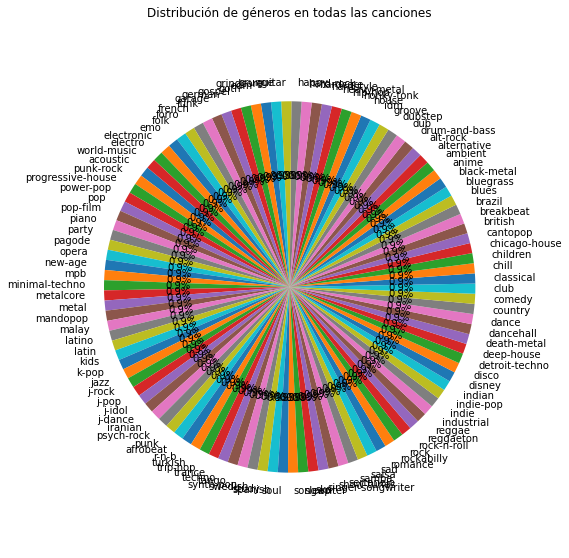

In [14]:
genre_counts = df_spotify['track_genre'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(8, 8))  
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de géneros en todas las canciones')

plt.axis('equal') 
plt.tight_layout()
plt.show()

Quise hacer un grafico de los generos de acuerdo a las canciones, pero es imposible hacer una visualizacion porque hay demasiados generos y no creo que agruparlos seala mejor opcion.

In [17]:
print("La cantidad de generos de las canciones son:",len(genre_counts))
df_spotify['track_genre'].value_counts()

La cantidad de generos de las canciones son: 114


acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
new-age              1000
mpb                  1000
minimal-techno       1000
metalcore            1000
metal                1000
mandopop             1000
malay                1000
latino               1000
latin                1000
kids                 1000
k-pop                1000
jazz                 1000
j-rock               1000
j-pop                1000
j-idol               1000
j-dance              1000
iranian              1000
psych-rock           1000
punk                 1000
afrobeat             1000
r-n-b                1000
turkish              1000
trip-hop             1000
trance               1000
techno               1000
tango                1000
synth-pop            1000
swedish              1000
study       

Aqui hice un conteo de las canciones por genero pero todos los generos tienen un total de 1000 filas porque si son 114 generos y 114 por 1000 da el numero total de filas del dataset.

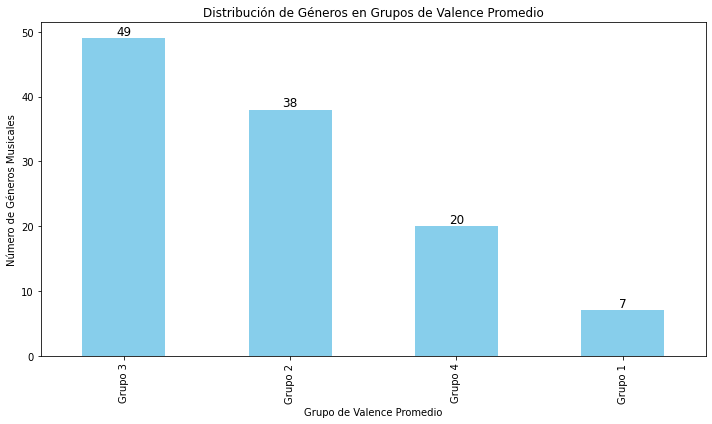

In [25]:
# Valence promedio por género musical
genre_valence_mean = df_spotify.groupby('track_genre')['valence'].mean()

# Dividir los géneros en grupos
num_groups = 4
valence_groups = pd.cut(genre_valence_mean, bins=num_groups, labels=False)

# Etiquetas de grupos a los géneros
group_labels = [f'Grupo {i+1}' for i in range(num_groups)]
genre_valence_grouped = [group_labels[i] for i in valence_groups]

# Número de géneros en cada grupo
genre_group_counts = pd.Series(genre_valence_grouped).value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6))
ax = genre_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Géneros en Grupos de Valence Promedio')
plt.xlabel('Grupo de Valence Promedio')
plt.ylabel('Número de Géneros Musicales')

# Conteo en cada barra
for i, v in enumerate(genre_group_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

Aqui hice un analisis de el valence de los generos y los dividi como si fueran cuartiles, poque como va de 0,0 a 1,0 pues los ordene de tal manera que se puedan apreciar como estan las canciones distribuidas segun su positividad musical, el grupo 1 es bajo y el grupo 4 es el mejor.